# PERFIL DOS CLIENTES DA FEDERAÇÃO DAS INDÚSTRIAS DE SC: UMA TAREFA DE CLUSTERIZAÇÃO
Deise Ferreira de Souza

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Pontifícia Universidade Católica De Minas Gerais

Objetivos

O objetivo deste estudo é por meio do uso de algoritmos de Machine Learning clusterizar os clientes das principais casas da FIESC, obter mais domínio sobre o perfil dos mesmos, contribuindo desta forma, para a definição de estratégias mais assertivas e eficazes de comunicação e relacionamento com os clientes.

In [4]:
# Carregar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
#ler a base de dados
dataframe_fiesc = pd.read_excel("base_kmodes_clientes (1).xlsm")

# 1- Limpeza dos dados 
 A Análise exploratória foi realizada no algoritmo k-prototypes o qual utilizou a mesma base + a variável faturamento

In [6]:
dataframe_fiesc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21810 entries, 0 to 21809
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21809 non-null  object
 1   Unnamed: 1  21809 non-null  object
 2   Unnamed: 2  21809 non-null  object
 3   Unnamed: 3  21809 non-null  object
dtypes: object(4)
memory usage: 681.7+ KB


In [8]:
#renomeando das colunas
dataframe_fiesc.rename(columns={'Unnamed: 0': 'cnpj','Unnamed: 1': 'produto','Unnamed: 2': 'porte','Unnamed: 3': 'setor'}, inplace = True)
dataframe_fiesc.drop(0)
dataframe_fiesc = dataframe_fiesc.drop(['cnpj'], axis = 1)

In [10]:
#Explorando os dados
for col in dataframe_fiesc.columns:
  print("Nome da coluna:", col)
  print("Lista de valores únicos:", dataframe_fiesc[col].unique())
  print("Total de valores únicos:", dataframe_fiesc[col].value_counts())
  print("Total de valores únicos:", dataframe_fiesc[col].nunique())
  if dataframe_fiesc[col].isnull().any():
    null_total = dataframe_fiesc[col].isnull().sum()
    total = len(dataframe_fiesc[col])
    porcent_null = (null_total/total)*100
    print(f"Tem {null_total} valores NULL; Correspondem a {porcent_null:.2f}% do total de valores dessa coluna")
  else:
    print("Não Tem NULL")
  print('-'*100)

Nome da coluna: produto
Lista de valores únicos: [nan 'IEL' 'Educação ' 'Tecnologia' 'Ensino Superior' 'Qualificação'
 'Ensino Técnico' 'SEGURANÇA E SAÚDE NO TRABALHO' 'Saúde Assistencial'
 'PROMOÇÃO DA SAÚDE' 'Ensino básico']
Total de valores únicos: produto
SEGURANÇA E SAÚDE NO TRABALHO    5215
Saúde Assistencial               4964
Tecnologia                       4282
Qualificação                     2744
IEL                              1487
PROMOÇÃO DA SAÚDE                1464
Ensino Técnico                    566
Ensino Superior                   473
Ensino básico                     391
Educação                          223
Name: count, dtype: int64
Total de valores únicos: 10
Tem 1 valores NULL; Correspondem a 0.00% do total de valores dessa coluna
----------------------------------------------------------------------------------------------------
Nome da coluna: porte
Lista de valores únicos: [nan 'Micro' 'Média' 'Pequena' 'Grande']
Total de valores únicos: porte
Pequena    8

In [11]:
dataframe_fiesc = dataframe_fiesc.dropna()

In [12]:
dataframe_fiesc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21809 entries, 1 to 21809
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   produto  21809 non-null  object
 1   porte    21809 non-null  object
 2   setor    21809 non-null  object
dtypes: object(3)
memory usage: 681.5+ KB


# 2 - Modelagem - k-modes

In [8]:
#modulo para o algoritmo de agrupamento
from kmodes.kmodes import KModes 

In [10]:
dataframe_fiesc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21809 entries, 1 to 21809
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   produto  21809 non-null  object
 1   porte    21809 non-null  object
 2   setor    21809 non-null  object
dtypes: object(3)
memory usage: 681.5+ KB


In [11]:
dataframe_fiesc.head()

,produto,porte,setor
1,IEL,Micro,INDÚSTRIA GRÁFICA
2,IEL,Média,ALIMENTOS E BEBIDAS
3,IEL,Pequena,ALIMENTOS E BEBIDAS
4,IEL,Pequena,SERVIÇOS FINANCEIROS E DE SEGUROS
5,IEL,Micro,"ARTES, CULTURA E ESPORTE"


In [13]:
#usar o numpy para converter o quadro de dados em uma matriz
import numpy as np 

In [14]:
#trandformando em matriz
dfMatrix = dataframe_fiesc.loc[:].to_numpy() 
dfMatrix

array([['IEL', 'Micro', 'INDÚSTRIA GRÁFICA'],
       ['IEL', 'Média', 'ALIMENTOS E BEBIDAS'],
       ['IEL', 'Pequena', 'ALIMENTOS E BEBIDAS'],
       ...,
       ['PROMOÇÃO DA SAÚDE', 'Pequena', 'SANEAMENTO BÁSICO'],
       ['Saúde Assistencial', 'Pequena', 'SANEAMENTO BÁSICO'],
       ['Saúde Assistencial', 'Pequena', 'SANEAMENTO BÁSICO']],
      dtype=object)

In [15]:
n_clusters = range(1,7)
for n_clus in n_clusters:
    print(n_clus)

1
2
3
4
5
6


In [16]:
#escolhendo o numero ideal de cluster

cost = []

for cluster in range (1,7):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('clusterização: {}'. format(cluster))
    except:
        break

clusterização: 1
clusterização: 2
clusterização: 3
clusterização: 4
clusterização: 5
clusterização: 6


In [17]:
from plotnine import * 
import plotnine
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
#convertendo os resultados em um data frame e plotando

df_cost = pd.DataFrame({'Cluster': range(1,7), 'Cost': cost})
df_cost


,Cluster,Cost
0,1,49149.0
1,2,40667.0
2,3,36023.0
3,4,33526.0
4,5,32273.0
5,6,30891.0


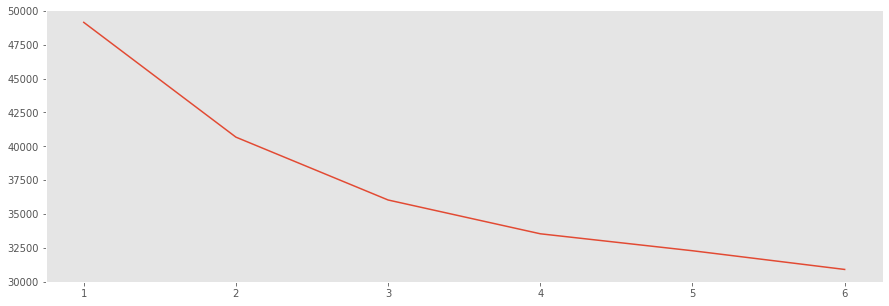

In [19]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, cost)
plt.grid()

In [20]:
#ajuste o cluster

kmodes = KModes(n_jobs = -1, n_clusters = 3 , init = "huang", random_state = 0)
cluster_pred = kmodes.fit_predict(dfMatrix)

In [21]:
cluster_pred

array([2, 0, 1, ..., 1, 1, 1], dtype=uint16)

In [22]:
kmodes.n_iter_

1

In [23]:
kmodes.cost_

36023.0

In [24]:
#cluster centroid
kmodes.cluster_centroids_

array([['Qualificação', 'Média', 'TÊXTIL, CONFECÇÃO, COURO E CALÇADOS'],
       ['Saúde Assistencial', 'Pequena',
        'TÊXTIL, CONFECÇÃO, COURO E CALÇADOS'],
       ['SEGURANÇA E SAÚDE NO TRABALHO', 'Micro', 'COMÉRCIO VAREJISTA']],
      dtype='<U35')

In [25]:
#adicione o cluster ao dataframe

dataframe_fiesc['Cluster Labels'] = kmodes.labels_

In [26]:
dataframe_fiesc['Clusters'] = dataframe_fiesc['Cluster Labels'].map({0: "Primeiro", 1: "Segundo", 2: "Terceiro"})


In [27]:
#Ordene o cluster
dataframe_fiesc['Clusters'] = dataframe_fiesc['Clusters'].astype('category')
dataframe_fiesc['Clusters'] = dataframe_fiesc['Clusters'].cat.reorder_categories(["Primeiro", "Segundo", "Terceiro"])

dataframe_fiesc

,produto,porte,setor,Cluster Labels,Clusters
1,IEL,Micro,INDÚSTRIA GRÁFICA,2,Terceiro
2,IEL,Média,ALIMENTOS E BEBIDAS,0,Primeiro
3,IEL,Pequena,ALIMENTOS E BEBIDAS,1,Segundo
4,IEL,Pequena,SERVIÇOS FINANCEIROS E DE SEGUROS,1,Segundo
5,IEL,Micro,"ARTES, CULTURA E ESPORTE",2,Terceiro
...,...,...,...,...,...
21805,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,1,Segundo
21806,SEGURANÇA E SAÚDE NO TRABALHO,Pequena,SANEAMENTO BÁSICO,1,Segundo
21807,PROMOÇÃO DA SAÚDE,Pequena,SANEAMENTO BÁSICO,1,Segundo
21808,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,1,Segundo


In [32]:
dataframe_fiesc['Clusters'].value_counts()


Clusters
Segundo     8752
Primeiro    8011
Terceiro    5046
Name: count, dtype: int64

In [33]:
list_col = ['Clusters']
cols = [col for col in dataframe_fiesc if col not in list_col ]

In [34]:
dataframe_fiesc = dataframe_fiesc.drop(['Cluster Labels'], axis = 1)

In [35]:
dataframe_fiesc

,produto,porte,setor,Clusters
1,IEL,Micro,INDÚSTRIA GRÁFICA,Terceiro
2,IEL,Média,ALIMENTOS E BEBIDAS,Primeiro
3,IEL,Pequena,ALIMENTOS E BEBIDAS,Segundo
4,IEL,Pequena,SERVIÇOS FINANCEIROS E DE SEGUROS,Segundo
5,IEL,Micro,"ARTES, CULTURA E ESPORTE",Terceiro
...,...,...,...,...
21805,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,Segundo
21806,SEGURANÇA E SAÚDE NO TRABALHO,Pequena,SANEAMENTO BÁSICO,Segundo
21807,PROMOÇÃO DA SAÚDE,Pequena,SANEAMENTO BÁSICO,Segundo
21808,Saúde Assistencial,Pequena,SANEAMENTO BÁSICO,Segundo


In [36]:
index = ["Primeiro","Segundo","Terceiro"]

In [37]:
#agrupando os clusters pelos centroides
df_final = pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)
df_final

,produto,porte,setor
Primeiro,Qualificação,Média,"TÊXTIL, CONFECÇÃO, COURO E CALÇADOS"
Segundo,Saúde Assistencial,Pequena,"TÊXTIL, CONFECÇÃO, COURO E CALÇADOS"
Terceiro,SEGURANÇA E SAÚDE NO TRABALHO,Micro,COMÉRCIO VAREJISTA


# 3- Interpretação dos resultados

In [152]:
pip install matplotlib

In [13]:
import  plotly.express  as  px 
import matplotlib.pyplot as plt

In [242]:
cores_hex = ['#081d58', '#253494', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1', '#ffffd9', '#ffffd9']

# Total de cada cluster

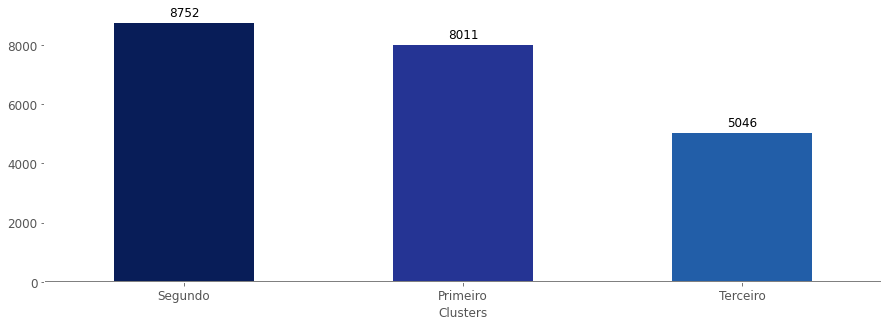

In [318]:
ax = df_total.plot(kind='bar', figsize=(15, 5),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')
plt.show()

# Médias gerais

In [316]:
df_media = dataframe_fiesc_d.groupby('Clusters').mean()
df_media

,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,produto_Tecnologia,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
Clusters,,,,,,,,,,,,,,,,,,,,,
Primeiro,0.018724,0.034078,0.034203,0.028211,0.058794,0.078018,0.334665,0.096243,0.118712,0.198352,...,0.008988,0.015728,0.007864,0.000624,0.011859,0.018724,0.018475,0.198852,0.000250,0.006990
Segundo,0.006170,0.015197,0.022966,0.012683,0.049246,0.067756,0.000000,0.200868,0.445384,0.179730,...,0.008798,0.019995,0.013368,0.005027,0.034506,0.029707,0.022623,0.133569,0.000457,0.008341
Terceiro,0.003765,0.013278,0.018034,0.010702,0.115933,0.048751,0.012485,0.532303,0.022790,0.221958,...,0.029330,0.044392,0.010503,0.008918,0.077685,0.026754,0.042608,0.010107,0.000991,0.003369


In [48]:
dataframe_fiesc_d['Clusters'] = dataframe_fiesc_d['Cluster Labels'].map({0: "Primeiro", 1: "Segundo", 2: "Terceiro"})

# Porte por Cluster

In [277]:
df_porte = dataframe_fiesc_d.groupby('Clusters').mean().filter(like='porte')
df_porte_percentual = df_porte.div(df_porte.sum(axis=1), axis=0) * 100
df_porte_percentual = df_porte_percentual.round(2)

df_porte_percentual

,porte_Grande,porte_Micro,porte_Média,porte_Pequena
Clusters,,,,
Primeiro,18.50,10.27,58.28,12.94
Segundo,3.01,15.69,0.00,81.31
Terceiro,4.97,92.45,0.65,1.92


In [287]:
df_porte_percentual_1 = df_porte_percentual.iloc[[0]].copy()
df_porte_percentual_sorted_1 = df_porte_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_porte_percentual_2 = df_porte_percentual.iloc[[1]].copy()
df_porte_percentual_sorted_2 = df_porte_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_porte_percentual_3 = df_porte_percentual.iloc[[2]].copy()
df_porte_percentual_sorted_3 = df_porte_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

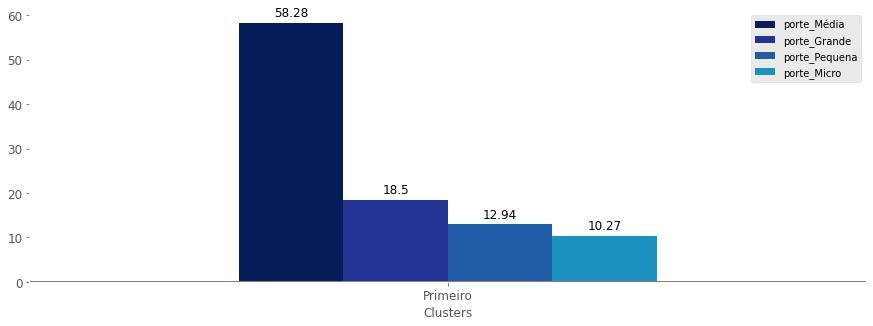

In [291]:
ax = df_porte_percentual_sorted_1.plot(kind='bar', figsize=(15, 5),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

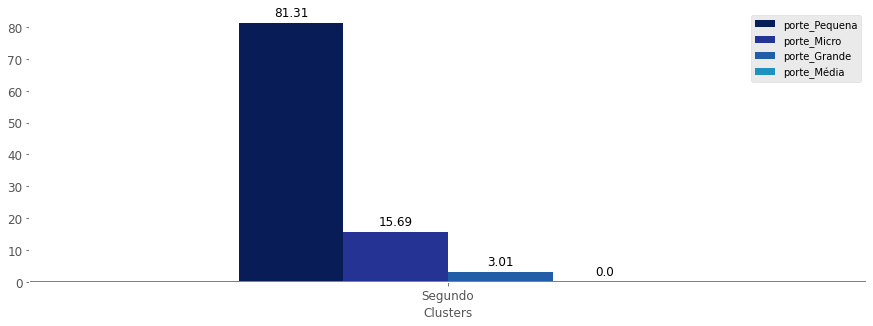

In [292]:
ax = df_porte_percentual_sorted_2.plot(kind='bar', figsize=(15, 5),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

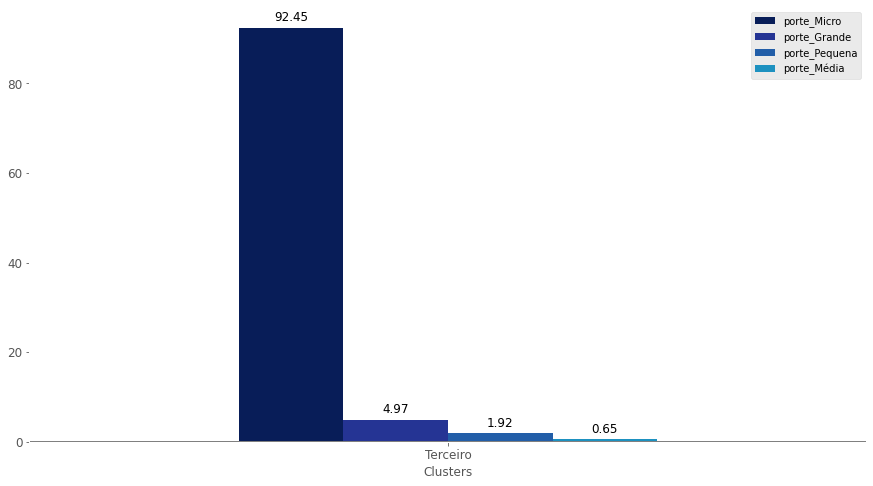

In [317]:
ax = df_porte_percentual_sorted_3.plot(kind='bar', figsize=(15, 8),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

# Produto por Cluster

In [294]:
df_produto = dataframe_fiesc_d.groupby('Clusters').mean().filter(like='produto')
df_produto_percentual = df_produto.div(df_produto.sum(axis=1), axis=0) * 100
df_produto_percentual = df_produto_percentual.round(2)
df_produto_percentual

,produto_Educação,produto_Ensino Superior,produto_Ensino Técnico,produto_Ensino básico,produto_IEL,produto_PROMOÇÃO DA SAÚDE,produto_Qualificação,produto_SEGURANÇA E SAÚDE NO TRABALHO,produto_Saúde Assistencial,produto_Tecnologia
Clusters,,,,,,,,,,
Primeiro,1.87,3.41,3.42,2.82,5.88,7.80,33.47,9.62,11.87,19.84
Segundo,0.62,1.52,2.30,1.27,4.92,6.78,0.00,20.09,44.54,17.97
Terceiro,0.38,1.33,1.80,1.07,11.59,4.88,1.25,53.23,2.28,22.20


In [296]:
df_produto_percentual_1 = df_produto_percentual.iloc[[0]].copy()
df_produto_percentual_sorted_1 = df_produto_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_produto_percentual_2 = df_produto_percentual.iloc[[1]].copy()
df_produto_percentual_sorted_2 = df_produto_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_produto_percentual_3 = df_produto_percentual.iloc[[2]].copy()
df_produto_percentual_sorted_3 = df_produto_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

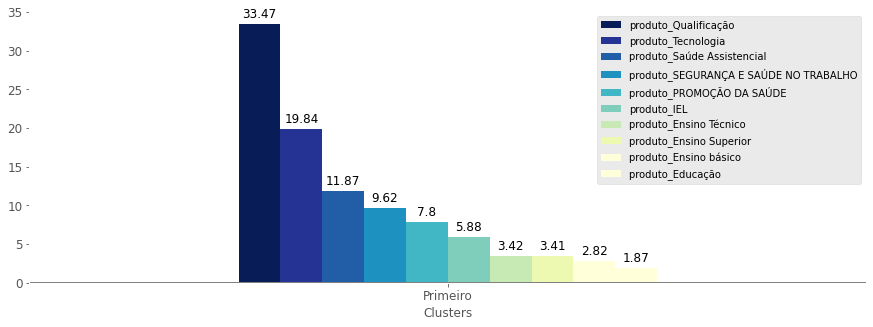

In [297]:
ax = df_produto_percentual_sorted_1.plot(kind='bar', figsize=(15, 5),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

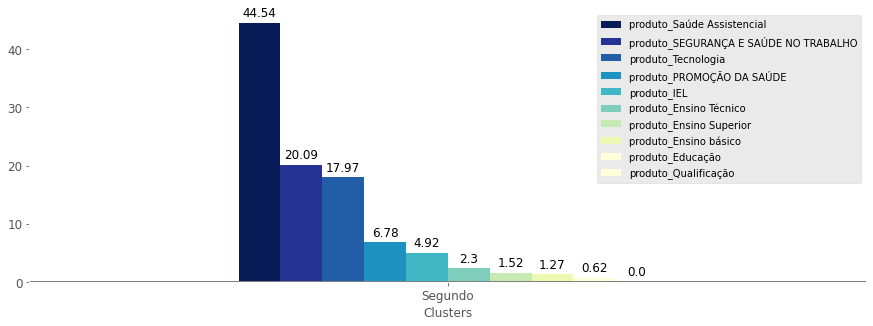

In [298]:
ax = df_produto_percentual_sorted_2.plot(kind='bar', figsize=(15, 5),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

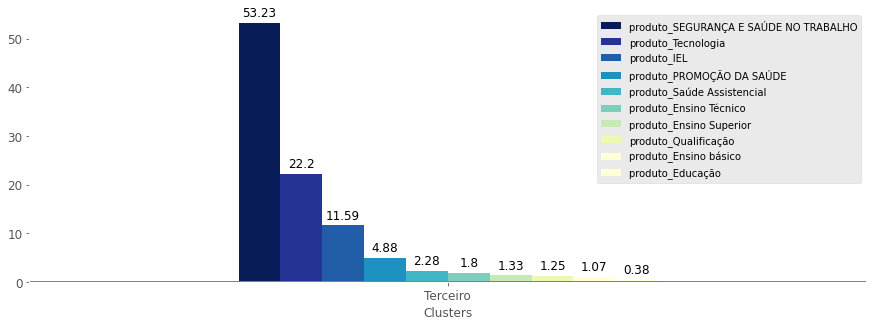

In [299]:
ax = df_produto_percentual_sorted_3.plot(kind='bar', figsize=(15, 5),color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
#ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')  
plt.show()

# Setor por Cluster (10+)

In [302]:
df_setor = dataframe_fiesc_d.groupby('Clusters').sum().filter(like='setor')
df_setor_percentual = df_setor.div(df_setor.sum(axis=1), axis=0) * 100
df_setor_percentual = df_setor_percentual.round(2)
df_setor_percentual

,setor_AGROPECUÁRIA,setor_ALIMENTOS E BEBIDAS,setor_ALOJAMENTO E ALIMENTAÇÃO,"setor_ARTES, CULTURA E ESPORTE",setor_AUTOMOTIVA,setor_CELULOSE E PAPEL,setor_CERÂMICA,setor_COMÉRCIO DE VEÍCULOS AUTOMOTORES,setor_COMÉRCIO POR ATACADO,setor_COMÉRCIO VAREJISTA,...,setor_SERVIÇOS DA SAÚDE,setor_SERVIÇOS DIVERSOS,setor_SERVIÇOS FINANCEIROS E DE SEGUROS,setor_SERVIÇOS IMOBILIÁRIOS,"setor_SERVIÇOS PROFISSIONAIS, CIENTÍFICOS E TÉCNICOS",setor_TIC,"setor_TRANSPORTE, ARMAZENAGEM E CORREIO","setor_TÊXTIL, CONFECÇÃO, COURO E CALÇADOS",setor_não definido,"setor_ÓLEO, GÁS E ELETRICIDADE"
Clusters,,,,,,,,,,,,,,,,,,,,,
Primeiro,0.42,8.89,0.29,0.19,3.06,2.87,2.62,0.87,3.64,1.60,...,0.90,1.57,0.79,0.06,1.19,1.87,1.85,19.89,0.02,0.70
Segundo,0.66,7.60,0.53,0.35,1.29,1.79,3.62,3.27,5.24,2.48,...,0.88,2.00,1.34,0.50,3.45,2.97,2.26,13.36,0.05,0.83
Terceiro,0.71,4.89,1.70,1.84,0.77,0.95,2.58,3.84,7.99,18.37,...,2.93,4.44,1.05,0.89,7.77,2.68,4.26,1.01,0.10,0.34


In [303]:
df_setor_percentual_1 = df_setor_percentual.iloc[[0]].copy()
df_setor_percentual_sorted_1 = df_setor_percentual_1.T.sort_values(by='Primeiro', ascending=False).T

df_setor_percentual_2 = df_setor_percentual.iloc[[1]].copy()
df_setor_percentual_sorted_2 = df_setor_percentual_2.T.sort_values(by='Segundo', ascending=False).T

df_setor_percentual_3 = df_setor_percentual.iloc[[2]].copy()
df_setor_percentual_sorted_3 = df_setor_percentual_3.T.sort_values(by='Terceiro', ascending=False).T

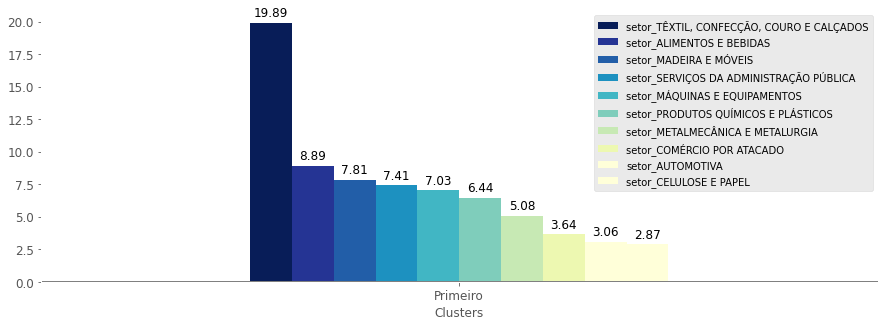

In [323]:
df_1_top_5 = df_setor_percentual_sorted_1.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_1_top_5.plot(kind='bar', figsize=(15, 5), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()


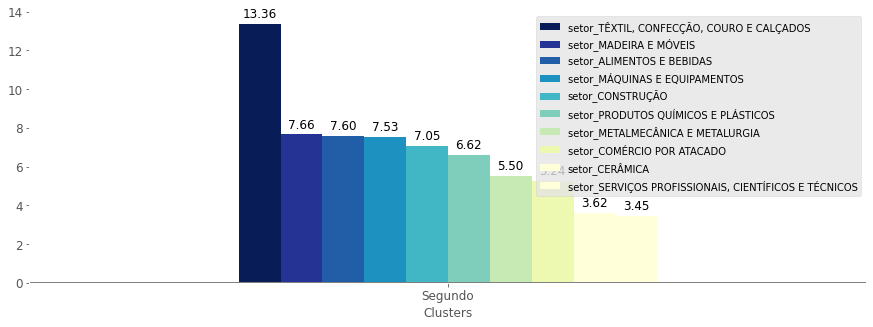

In [325]:
df_2_top_5 = df_setor_percentual_sorted_2.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_2_top_5.plot(kind='bar', figsize=(15, 5), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

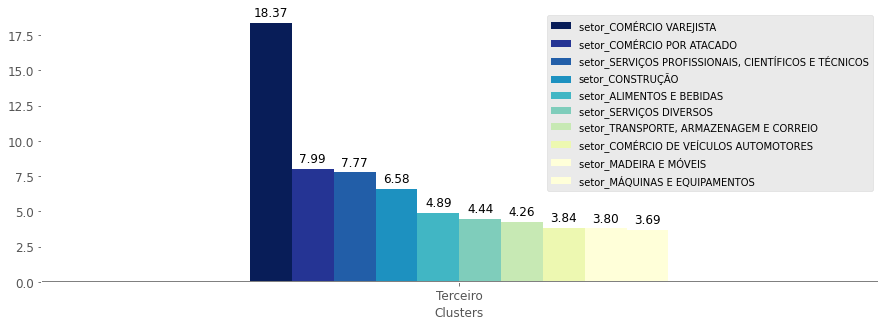

In [321]:
df_3_top_5 = df_setor_percentual_sorted_3.iloc[:, :10]  # Seleciona as cinco primeiras colunas

ax = df_3_top_5.plot(kind='bar', figsize=(15, 5), color=cores_hex, fontsize='large')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize='large')

plt.xticks(rotation=0)
ax.set_facecolor('none')
ax.axhline(0, color='gray', linewidth=2, linestyle='-')
ax.set_xlabel('Clusters', fontsize='large')

plt.show()

## Primeiro Cluster:

36% dos clientes

portes: médias(58,28%)
grandes (18,5%)

produtos: qualificação + tecnologia (50%)
saúde(30%)

setor: indústria da transformação (têxtil - 19,89%)



## Segundo Cluster: 

40% dos clientes

portes: pequenas(81,31%)
micro(15,69%)

produtos: saúde assistencial(44%)
sst(20%)
tecnologia(18%)

setor: indústria da transformação (diverso)



## Terceiro Cluster:

23% dos clientes

porte: micro(92,45%)

produto: sst(53,23%)
tecnologia(22,2%)

setor: comércio e serviços (52%)

